Linear and Logistic Regression Performance on Predicting Continuous Data

In [1]:
#importing required modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
#reading from dataset
df = pd.read_csv('datasets/Sank.csv')
df

,Alive,Class,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [3]:
#one hot encoding sex
dummies = pd.get_dummies(df['Sex'])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [4]:
#merging dummy variables and main dataset
merged = pd.concat([df,dummies],axis='columns')
merged

,Alive,Class,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,1
887,1,1,female,19.0,30.0000,1,0
888,0,3,female,NaN,23.4500,1,0
889,1,1,male,26.0,30.0000,0,1


In [5]:
final = merged.drop(["Sex","male"],axis='columns')
final

,Alive,Class,Age,Fare,female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
...,...,...,...,...,...
886,0,2,27.0,13.0000,0
887,1,1,19.0,30.0000,1
888,0,3,NaN,23.4500,1
889,1,1,26.0,30.0000,0


In [6]:
# Dropping rows with missing data
final = final[final['Age'].notna()]
final

,Alive,Class,Age,Fare,female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
...,...,...,...,...,...
885,0,3,39.0,29.1250,1
886,0,2,27.0,13.0000,0
887,1,1,19.0,30.0000,1
889,1,1,26.0,30.0000,0


In [7]:
# removing dependent variables
X = final.drop('Alive',axis='columns')
X

,Class,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
885,3,39.0,29.1250,1
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
889,1,26.0,30.0000,0


In [8]:
# column of dependent variables
y = final['Alive']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Alive, Length: 714, dtype: int64

In [9]:
#creating linear regression model
model = LinearRegression()

In [10]:
# fitting model
model.fit(X.values,y)

LinearRegression()

In [11]:
#generating model score
model.score(X.values,y)

0.39020129996439834

The model score is 0.39(2 d.p)

In [12]:
#CLASS,AGE,FARE,FEMALE
model.predict([[1,28,20.5,0],[2,70,7.5,0],[3,25,6.76,1],[2,43,12.88,1]])

array([0.48729684, 0.05811995, 0.58046934, 0.68364184])

The first two individuals are most likely dead since the predicted values are closer to 0, while the last two are most likely alive since the predicted values are closer to 1.

##### B

###### For test size 0.2 

In [13]:
# creating testing and training sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.predict(X_test)

array([ 0.77113609,  0.58431007,  0.54383096,  0.59876676,  0.75289223,
        0.15295518,  0.00251439,  1.1702496 ,  0.72012689,  0.06656717,
        0.04913186,  0.01988328,  0.74112775,  0.04324012,  1.03589317,
        0.1276906 ,  0.12337324,  0.35091856,  0.66278312,  0.43176775,
        0.14811491,  0.10749754,  0.25794107,  0.01988328,  0.08411768,
        0.78947393,  0.31051533,  0.35140641, -0.04433348,  0.57473369,
        0.25632756,  0.21714429,  1.09530386,  0.56580611,  0.01106399,
        0.15428037,  0.10736745, -0.13205481,  0.30598297,  0.3609482 ,
        0.94889143,  0.95714096,  1.07798238,  0.78996179,  0.23277406,
        0.02544029,  0.11893002,  0.2096762 ,  0.14143463,  0.60460835,
        0.80618559,  0.78916137,  0.13675562,  0.2078069 ,  0.77455107,
        0.28930105,  0.13087338,  0.10801929,  0.63677966,  0.05492329,
        0.93688255,  0.12503179,  0.07801317,  0.49164747,  0.01325934,
        0.59983095,  1.10149411,  0.60675132,  0.24029875,  0.68

In [16]:
model.score(X_test, y_test)

0.3882331767101983

The model score is 0.39(2 d.p)

In [17]:
#making predictions with model
model.predict([[1,28,20.5,0],[2,70,7.5,0],[3,25,6.76,1],[2,43,12.88,1]])

/Users/edemtracy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.50262914, 0.04585525, 0.57440358, 0.67844481])

The first two individuals are most likely dead since the predicted values are closer to 0, while the last two are most likely alive since the predicted values are closer to 1.

###### For test size 0.3

In [18]:
# creating testing and training sets with an 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.predict(X_test)

array([ 1.01397786,  0.74736367,  0.02282951,  0.46087269,  0.6810944 ,
        0.267151  ,  0.45420337,  1.05681087,  0.4154516 ,  0.58435657,
        0.59103663,  1.13898202,  0.31028823,  0.31578443,  0.38603479,
        0.28701703,  0.28207973,  0.11131521, -0.00224578,  0.4408103 ,
        0.09804068,  0.90149973,  0.44011334,  0.35796272,  0.06462226,
        0.61003949, -0.03891821,  0.78299119,  0.67403484,  0.12468755,
        0.14346904,  0.03115451,  0.47152371,  0.20936766,  1.01950845,
        0.5776588 , -0.00625416,  0.32456243,  0.12018973,  0.48448408,
        0.44879665,  0.31522702,  0.66285757,  0.1178481 ,  0.11806315,
        0.04159764,  0.33582461,  1.00084535,  0.13803544,  0.61091488,
        0.06439245,  0.16748847,  0.20024922,  0.07132088,  0.78693802,
        0.13135242,  0.15794194,  0.48396974,  0.14469989,  0.75926027,
        0.72514315,  0.14822557,  0.98534069,  0.89593537,  0.40900238,
        0.39830194,  0.6466315 ,  0.22354141,  0.11807327,  0.06

In [21]:
model.score(X_test, y_test)

0.3375274318855708

The model score is 0.39(2 d.p)

In [22]:
model.predict([[1,28,20.5,0],[2,70,7.5,0],[3,25,6.76,1],[2,43,12.88,1]])

/Users/edemtracy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.51221632, 0.01518101, 0.56441658, 0.66134467])

The second individual is most likely dead since the predicted value is closer to 0, while the first, third, and last are most likely alive since the predicted values are closer to 1.

###### For test size 0.4

In [23]:
# creating testing and training sets with an 60-40 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
model.predict(X_test)

array([ 0.0911065 ,  1.02962605,  0.74176355,  0.40541655,  0.76326712,
        0.11444842,  0.15604581,  0.34536171,  0.09064919,  0.11723571,
        0.93235971,  0.03711993,  0.05474805,  0.12084823,  0.62666367,
        0.07281822,  0.23639678,  0.61451018,  0.66789872,  0.2701281 ,
        0.56385967,  0.09062104,  0.47943182,  0.0074216 ,  0.00147325,
        0.16802693,  0.8118956 ,  0.2714025 ,  0.27960224,  0.08475009,
        0.36651555,  0.50792542,  0.15018189,  0.12671918,  0.66121804,
        0.34196383,  0.90512879,  0.59235135,  0.24533811,  0.30114422,
        0.91362929,  0.06707509,  0.73996623,  0.42630858,  0.15013849,
        0.59244993,  0.5406995 ,  1.03485471,  0.6865625 ,  0.14103423,
        0.08035188,  0.27664728,  0.06731312,  0.46309621,  0.14456422,
        0.92015345,  0.91018832,  0.72228423,  0.4748906 ,  0.65020025,
        0.90204904,  0.73127873,  0.7216287 ,  0.5848177 ,  0.76555693,
        0.33683429,  0.01346963, -0.04044541,  0.61371421,  0.81

In [26]:
model.score(X_test, y_test)

0.40044765933082005

The model score is 0.41(2 d.p)

In [27]:
model.predict([[1,28,20.5,0],[2,70,7.5,0],[3,25,6.76,1],[2,43,12.88,1]])

/Users/edemtracy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.47066922, 0.03192084, 0.59638653, 0.67629798])

The second individual is most likely dead since the predicted value is closer to 0, while the first, third, and last are most likely alive since the predicted values are closer to 1.

##### C

In [29]:
# creating testing and training sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_predicted = model.predict(X_test)

In [33]:
model.score(X_test,y_test)

0.8671328671328671

The model score is 0.75(2 d.p)

In [34]:
#generating confusion matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[68, 10],
       [ 9, 56]])

Text(95.72222222222221, 0.5, 'Truth')

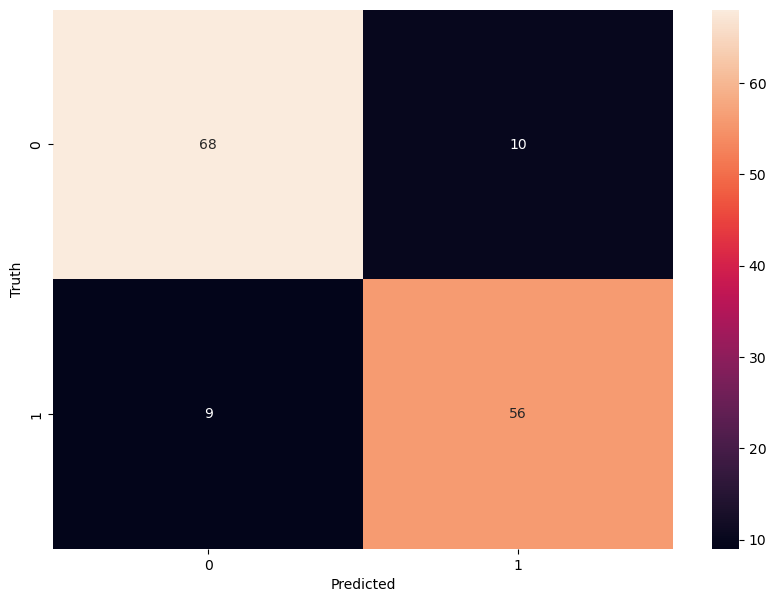

In [35]:
#plotting confusion matrix with heatmap
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
model.predict([[1,28,20.5,0],[2,70,7.5,0],[3,25,6.76,1],[2,43,12.88,1]])

/Users/edemtracy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 1, 1])

The second individual is dead since the predicted value is 0, while the first, third, and last are alive since the predicted value for each is 1.


##### D
Logistic regression predicts better since it has a higher model score and it predicts the actual discrete values rather than continuous numbers that need to be approximated before interpreting.